In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
np.random.seed(0)
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')
# pl.rcParams['savefig.dpi'] = 300 # dpi for most publications
# pl.rcParams['xtick.labelsize'] = 7
# pl.rcParams['ytick.labelsize'] = 7
# pl.rcParams['axes.labelsize'] = 7
# pl.rcParams['axes.titlesize'] = 5
# pl.rcParams['legend.fontsize'] = 5
# pl.rcParams['xtick.labelsize'] = 5
# pl.rcParams['ytick.labelsize'] = 5
# pl.rcParams['font.size'] = 7

# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
NOTEBOOK_NAME = 'decoding_combined_vhpcVSdhpc'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
# load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [6]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [12]:
#import vHPC decoding scores
vhpc_scores_CS = ut.load_variable('scores_CS', 'autorestore/decoding_combined_vhpc_ncells/')
vhpc_scores_CS['expo'] = ut.load_variable('expo_scores_CS', 'autorestore/decoding_combined_vhpc_ncells/')

vhpc_scores = ut.load_variable('scores', 'autorestore/decoding_combined_vhpc_ncells/')
vhpc_scores['expo'] = ut.load_variable('expo_scores', 'autorestore/decoding_combined_vhpc_ncells/')

#scores using global min of n cells
vhpc_scores_CS_gmin = ut.load_variable('scores_CS_gmin', 'autorestore/decoding_combined_vhpc_ncells/')
vhpc_scores_CS_gmin['expo'] = ut.load_variable('expo_scores_CS_gmin', 'autorestore/decoding_combined_vhpc_ncells/')

vhpc_scores_gmin = ut.load_variable('scores_gmin', 'autorestore/decoding_combined_vhpc_ncells/')
vhpc_scores_gmin['expo'] = ut.load_variable('expo_scores_gmin', 'autorestore/decoding_combined_vhpc_ncells/')

#scores using first 30 tirals AND n cells global min
vhpc_scores_CS_first30_gmin = ut.load_variable('scores_CS_gmin', 'autorestore/decoding_combined_vhpc_first30trials/')
vhpc_scores_CS_first30_gmin['expo'] = ut.load_variable('expo_scores_CS_gmin', 'autorestore/decoding_combined_vhpc_first30trials/')

vhpc_scores_first30_gmin = ut.load_variable('scores_gmin', 'autorestore/decoding_combined_vhpc_first30trials/')
vhpc_scores_first30_gmin['expo'] = ut.load_variable('expo_scores_gmin', 'autorestore/decoding_combined_vhpc_first30trials/')

In [13]:
#import dHPC decoding scores
dhpc_scores_CS = ut.load_variable('scores_CS', 'autorestore/decoding_combined_dhpc_ncells/')
dhpc_scores_CS['expo'] = ut.load_variable('expo_scores_CS', 'autorestore/decoding_combined_dhpc_ncells/')

dhpc_scores = ut.load_variable('scores', 'autorestore/decoding_combined_dhpc_ncells/')
dhpc_scores['expo'] = ut.load_variable('expo_scores', 'autorestore/decoding_combined_dhpc_ncells/')


dhpc_scores_CS_gmin = ut.load_variable('scores_CS_gmin', 'autorestore/decoding_combined_dhpc_ncells/')
dhpc_scores_CS_gmin['expo'] = ut.load_variable('expo_scores_CS_gmin', 'autorestore/decoding_combined_dhpc_ncells/')

dhpc_scores_gmin = ut.load_variable('scores_gmin', 'autorestore/decoding_combined_dhpc_ncells/')
dhpc_scores_gmin['expo'] = ut.load_variable('expo_scores_gmin', 'autorestore/decoding_combined_dhpc_ncells/')

#scores using first 30 tirals AND n cells global min
dhpc_scores_CS_first30_gmin = ut.load_variable('scores_CS_gmin', 'autorestore/decoding_combined_dhpc_first30trials/')
dhpc_scores_CS_first30_gmin['expo'] = ut.load_variable('expo_scores_CS_gmin', 'autorestore/decoding_combined_dhpc_first30trials/')

dhpc_scores_first30_gmin = ut.load_variable('scores_gmin', 'autorestore/decoding_combined_dhpc_first30trials/')
dhpc_scores_first30_gmin['expo'] = ut.load_variable('expo_scores_gmin', 'autorestore/decoding_combined_dhpc_first30trials/')

In [14]:
dhpc_scores.keys()

['pre', 'ext2', 'ext1', 'renew', 'expo', 'post']

In [15]:
sessions= 'pre','post','ext1','ext2','renew','expo'

In [16]:
# dict entries are not ordered, so decided to create and OrderedDict below
#markers = ['vhpc_','dhpc_']
#vhpc_and_dhpc_scores_CS = {}
#for sess in sessions:
#    for marker in markers:
#        vhpc_and_dhpc_scores_CS[marker+sess] = eval('%sscores_CS[\'%s\']'%(marker,sess))
#print vhpc_and_dhpc_scores_CS

In [17]:
from collections import OrderedDict
vhpc_and_dhpc_scores_CS = OrderedDict()
vhpc_and_dhpc_scores_CS['vhpc_expo'] = vhpc_scores_CS['expo']
vhpc_and_dhpc_scores_CS['dhpc_expo'] = dhpc_scores_CS['expo']
vhpc_and_dhpc_scores_CS['vhpc_pre'] = vhpc_scores_CS['pre']
vhpc_and_dhpc_scores_CS['dhpc_pre'] = dhpc_scores_CS['pre']
vhpc_and_dhpc_scores_CS['vhpc_post'] = vhpc_scores_CS['post']
vhpc_and_dhpc_scores_CS['dhpc_post'] = dhpc_scores_CS['post']
vhpc_and_dhpc_scores_CS['vhpc_ext1'] = vhpc_scores_CS['ext1']
vhpc_and_dhpc_scores_CS['dhpc_ext1'] = dhpc_scores_CS['ext1']
vhpc_and_dhpc_scores_CS['vhpc_ext2'] = vhpc_scores_CS['ext2']
vhpc_and_dhpc_scores_CS['dhpc_ext2'] = dhpc_scores_CS['ext2']
vhpc_and_dhpc_scores_CS['vhpc_renew'] = vhpc_scores_CS['renew']
vhpc_and_dhpc_scores_CS['dhpc_renew'] = dhpc_scores_CS['renew']
#print vhpc_and_dhpc_scores_CS

In [18]:
vhpc_and_dhpc_scores = OrderedDict()
vhpc_and_dhpc_scores['vhpc_expo'] = vhpc_scores['expo']
vhpc_and_dhpc_scores['dhpc_expo'] = dhpc_scores['expo']
vhpc_and_dhpc_scores['vhpc_pre'] = vhpc_scores['pre']
vhpc_and_dhpc_scores['dhpc_pre'] = dhpc_scores['pre']
vhpc_and_dhpc_scores['vhpc_post'] = vhpc_scores['post']
vhpc_and_dhpc_scores['dhpc_post'] = dhpc_scores['post']
vhpc_and_dhpc_scores['vhpc_ext1'] = vhpc_scores['ext1']
vhpc_and_dhpc_scores['dhpc_ext1'] = dhpc_scores['ext1']
vhpc_and_dhpc_scores['vhpc_ext2'] = vhpc_scores['ext2']
vhpc_and_dhpc_scores['dhpc_ext2'] = dhpc_scores['ext2']
vhpc_and_dhpc_scores['vhpc_renew'] = vhpc_scores['renew']
vhpc_and_dhpc_scores['dhpc_renew'] = dhpc_scores['renew']
#print vhpc_and_dhpc_scores_CS

dHPC20 removed from pre due to stellar behavioral performance (d'=2)


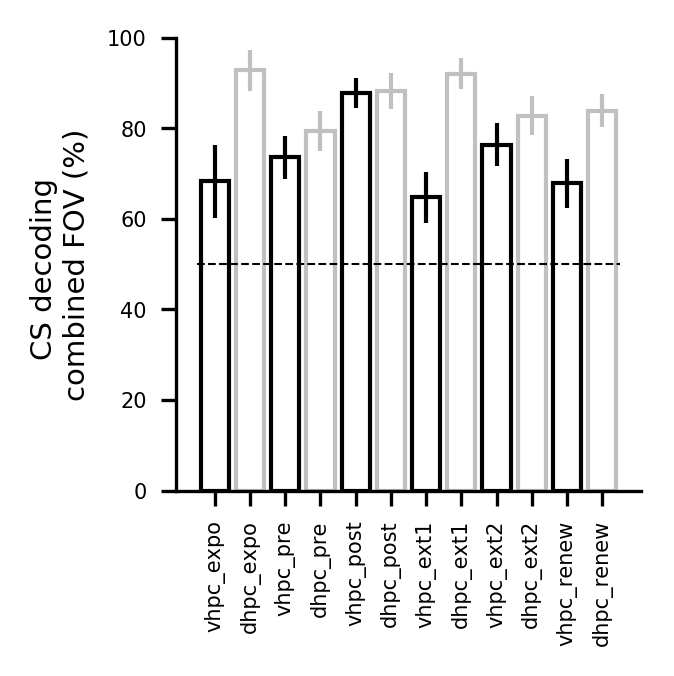

In [19]:
fig, ax = pl.subplots(1, 1, figsize=(2, 2))
#sessionsb = 'pre','post','ext1','ext2','reinstate','odor expo'
values = [vhpc_and_dhpc_scores_CS[keys]*100 for keys in vhpc_and_dhpc_scores_CS]
pt.plot_bars(values, ax=ax, colors = ['k','silver'])
ax.hlines(50, -0.5, len(vhpc_and_dhpc_scores_CS)-0.5, linestyles='dashed')

ax.set_xticks(range(12))
ax.set_xticklabels(vhpc_and_dhpc_scores_CS.keys(), rotation=90)
ax.set_ylabel('CS decoding \ncombined FOV (%)')
ax.set_ylim(0,100)
pvs = []
#pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 104)) #will compare sessions 'x' in values[x]
#pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 109))
#pvs.append(pt.add_significance(ax, values[2], values[3], 2, 3, 100))
#pvs.append(pt.add_significance(ax, values[3], values[4], 3, 4, 106))
#pvs.append(pt.add_significance(ax, values[0], values[4], 0, 4, 120))

print 'dHPC20 removed from pre due to stellar behavioral performance (d\'=2)'
fig.savefig('../img/%s__bars_CS.pdf'%NOTEBOOK_NAME)
np.savetxt('../img/%s__bars_CS.pvs'%NOTEBOOK_NAME,  pvs, header='Mann-Whitney U two-sided')

dHPC20 removed from pre due to stellar behavioral performance (d'=2)


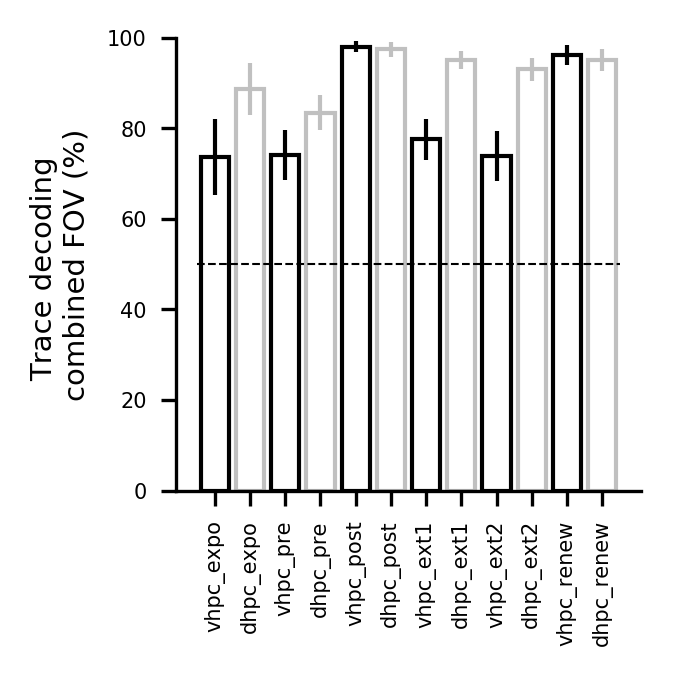

In [20]:
fig, ax = pl.subplots(1, 1, figsize=(2, 2))
#sessionsb = 'pre','post','ext1','ext2','reinstate','odor expo'
values = [vhpc_and_dhpc_scores[keys]*100 for keys in vhpc_and_dhpc_scores]
pt.plot_bars(values, ax=ax, colors = ['k','silver'])
ax.hlines(50, -0.5, len(vhpc_and_dhpc_scores)-0.5, linestyles='dashed')

ax.set_xticks(range(12))
ax.set_xticklabels(vhpc_and_dhpc_scores.keys(), rotation=90)
ax.set_ylabel('Trace decoding \ncombined FOV (%)')
ax.set_ylim(0,100)
#pvs = []
#pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 104)) #will compare sessions 'x' in values[x]
#pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 109))
#pvs.append(pt.add_significance(ax, values[2], values[3], 2, 3, 100))
#pvs.append(pt.add_significance(ax, values[3], values[4], 3, 4, 106))
#pvs.append(pt.add_significance(ax, values[0], values[4], 0, 4, 120))

print 'dHPC20 removed from pre due to stellar behavioral performance (d\'=2)'
fig.savefig('../img/%s__bars.pdf'%NOTEBOOK_NAME)
np.savetxt('../img/%s__bars.pvs'%NOTEBOOK_NAME,  pvs, header='Mann-Whitney U two-sided')

In [21]:
# to examine trace decoding scores, use 'vhpc_and_dhpc_scores'. For CS decoding, use 'vhpc_and_dhpc_scores_CS'
# to examine a specific session, put name of the session in the [] (eg, ['vhpc_renew'] to look at vhpc renew session)
print np.mean(vhpc_and_dhpc_scores['vhpc_pre'])
print np.std(vhpc_and_dhpc_scores['vhpc_pre'])
print sstats.sem(vhpc_and_dhpc_scores['vhpc_pre'])

0.74125
0.0554318275001
0.00557110828065


# Now plot using global minimum for n cells (490)

In [22]:
#from collections import OrderedDict
vhpc_and_dhpc_scores_CS_gmin = OrderedDict()
vhpc_and_dhpc_scores_CS_gmin['vhpc_expo'] = vhpc_scores_CS_gmin['expo']
vhpc_and_dhpc_scores_CS_gmin['dhpc_expo'] = dhpc_scores_CS_gmin['expo']
vhpc_and_dhpc_scores_CS_gmin['vhpc_pre'] = vhpc_scores_CS_gmin['pre']
vhpc_and_dhpc_scores_CS_gmin['dhpc_pre'] = dhpc_scores_CS_gmin['pre']
vhpc_and_dhpc_scores_CS_gmin['vhpc_post'] = vhpc_scores_CS_gmin['post']
vhpc_and_dhpc_scores_CS_gmin['dhpc_post'] = dhpc_scores_CS_gmin['post']
vhpc_and_dhpc_scores_CS_gmin['vhpc_ext1'] = vhpc_scores_CS_gmin['ext1']
vhpc_and_dhpc_scores_CS_gmin['dhpc_ext1'] = dhpc_scores_CS_gmin['ext1']
vhpc_and_dhpc_scores_CS_gmin['vhpc_ext2'] = vhpc_scores_CS_gmin['ext2']
vhpc_and_dhpc_scores_CS_gmin['dhpc_ext2'] = dhpc_scores_CS_gmin['ext2']
vhpc_and_dhpc_scores_CS_gmin['vhpc_renew'] = vhpc_scores_CS_gmin['renew']
vhpc_and_dhpc_scores_CS_gmin['dhpc_renew'] = dhpc_scores_CS_gmin['renew']
#print vhpc_and_dhpc_scores_CS

In [23]:
vhpc_and_dhpc_scores_gmin = OrderedDict()
vhpc_and_dhpc_scores_gmin['vhpc_expo'] = vhpc_scores_gmin['expo']
vhpc_and_dhpc_scores_gmin['dhpc_expo'] = dhpc_scores_gmin['expo']
vhpc_and_dhpc_scores_gmin['vhpc_pre'] = vhpc_scores_gmin['pre']
vhpc_and_dhpc_scores_gmin['dhpc_pre'] = dhpc_scores_gmin['pre']
vhpc_and_dhpc_scores_gmin['vhpc_post'] = vhpc_scores_gmin['post']
vhpc_and_dhpc_scores_gmin['dhpc_post'] = dhpc_scores_gmin['post']
vhpc_and_dhpc_scores_gmin['vhpc_ext1'] = vhpc_scores_gmin['ext1']
vhpc_and_dhpc_scores_gmin['dhpc_ext1'] = dhpc_scores_gmin['ext1']
vhpc_and_dhpc_scores_gmin['vhpc_ext2'] = vhpc_scores_gmin['ext2']
vhpc_and_dhpc_scores_gmin['dhpc_ext2'] = dhpc_scores_gmin['ext2']
vhpc_and_dhpc_scores_gmin['vhpc_renew'] = vhpc_scores_gmin['renew']
vhpc_and_dhpc_scores_gmin['dhpc_renew'] = dhpc_scores_gmin['renew']
#print vhpc_and_dhpc_scores_CS

dHPC20 removed from pre due to stellar behavioral performance (d'=2)


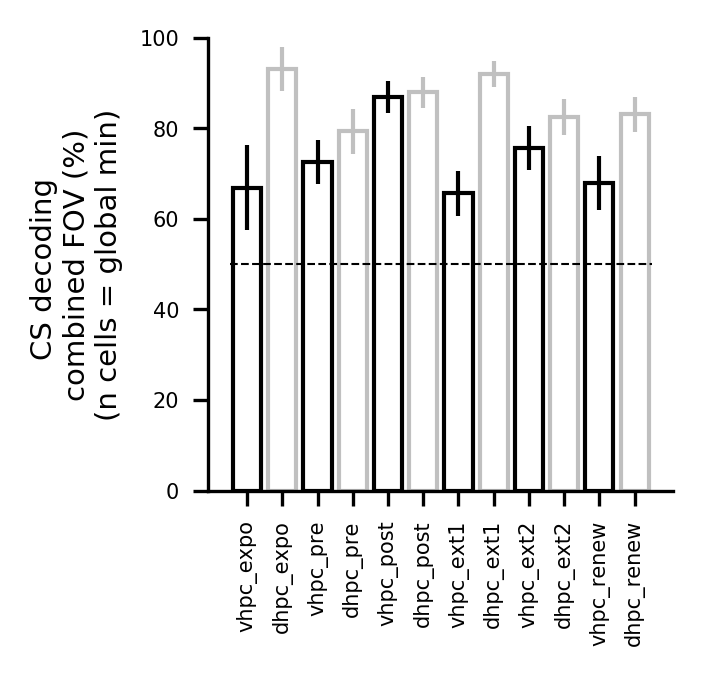

In [24]:
fig, ax = pl.subplots(1, 1, figsize=(2, 2))
#sessionsb = 'pre','post','ext1','ext2','reinstate','odor expo'
values = [vhpc_and_dhpc_scores_CS_gmin[keys]*100 for keys in vhpc_and_dhpc_scores_CS_gmin]
pt.plot_bars(values, ax=ax, colors = ['k','silver'])
ax.hlines(50, -0.5, len(vhpc_and_dhpc_scores_CS_gmin)-0.5, linestyles='dashed')

ax.set_xticks(range(12))
ax.set_xticklabels(vhpc_and_dhpc_scores_CS_gmin.keys(), rotation=90)
ax.set_ylabel('CS decoding \ncombined FOV (%)\n(n cells = global min)')
ax.set_ylim(0,100)
pvs = []
#pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 104)) #will compare sessions 'x' in values[x]
#pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 109))
#pvs.append(pt.add_significance(ax, values[2], values[3], 2, 3, 100))
#pvs.append(pt.add_significance(ax, values[3], values[4], 3, 4, 106))
#pvs.append(pt.add_significance(ax, values[0], values[4], 0, 4, 120))

print 'dHPC20 removed from pre due to stellar behavioral performance (d\'=2)'
fig.savefig('../img/%s__bars_CS_gmin.pdf'%NOTEBOOK_NAME)
np.savetxt('../img/%s__bars_CS_gmin.pvs'%NOTEBOOK_NAME,  pvs, header='Mann-Whitney U two-sided')

dHPC20 removed from pre due to stellar behavioral performance (d'=2)


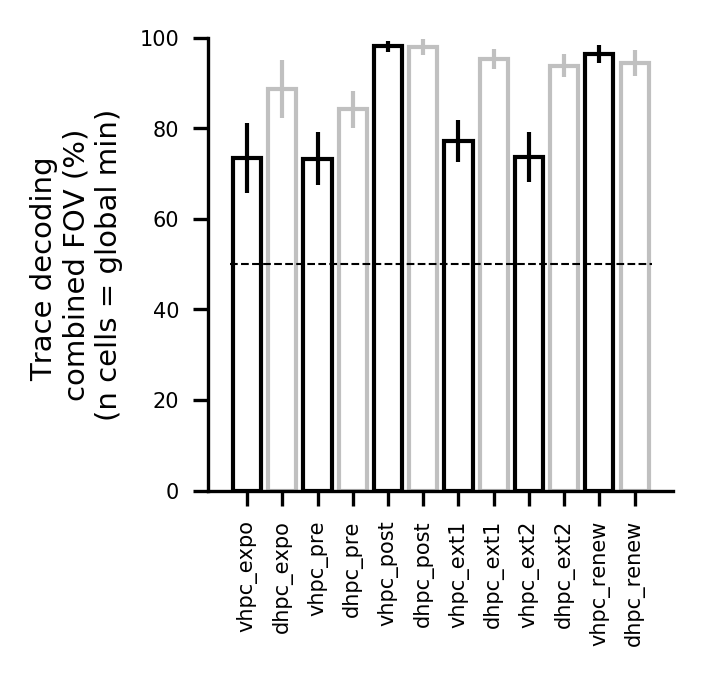

In [25]:
fig, ax = pl.subplots(1, 1, figsize=(2, 2))
#sessionsb = 'pre','post','ext1','ext2','reinstate','odor expo'
values = [vhpc_and_dhpc_scores_gmin[keys]*100 for keys in vhpc_and_dhpc_scores_gmin]
pt.plot_bars(values, ax=ax, colors = ['k','silver'])
ax.hlines(50, -0.5, len(vhpc_and_dhpc_scores_gmin)-0.5, linestyles='dashed')

ax.set_xticks(range(12))
ax.set_xticklabels(vhpc_and_dhpc_scores_gmin.keys(), rotation=90)
ax.set_ylabel('Trace decoding \ncombined FOV (%)\n(n cells = global min)')
ax.set_ylim(0,100)
#pvs = []
#pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 104)) #will compare sessions 'x' in values[x]
#pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 109))
#pvs.append(pt.add_significance(ax, values[2], values[3], 2, 3, 100))
#pvs.append(pt.add_significance(ax, values[3], values[4], 3, 4, 106))
#pvs.append(pt.add_significance(ax, values[0], values[4], 0, 4, 120))

print 'dHPC20 removed from pre due to stellar behavioral performance (d\'=2)'
fig.savefig('../img/%s__bars_gmin.pdf'%NOTEBOOK_NAME)
np.savetxt('../img/%s__bars_gmin.pvs'%NOTEBOOK_NAME,  pvs, header='Mann-Whitney U two-sided')

# and now, global min n cells and first 30 trials of each session only

In [26]:
#from collections import OrderedDict
vhpc_and_dhpc_scores_CS_first30_gmin = OrderedDict()
vhpc_and_dhpc_scores_CS_first30_gmin['vhpc_expo'] = vhpc_scores_CS_first30_gmin['expo']
vhpc_and_dhpc_scores_CS_first30_gmin['dhpc_expo'] = dhpc_scores_CS_first30_gmin['expo']
vhpc_and_dhpc_scores_CS_first30_gmin['vhpc_pre'] = vhpc_scores_CS_first30_gmin['pre']
vhpc_and_dhpc_scores_CS_first30_gmin['dhpc_pre'] = dhpc_scores_CS_first30_gmin['pre']
vhpc_and_dhpc_scores_CS_first30_gmin['vhpc_post'] = vhpc_scores_CS_first30_gmin['post']
vhpc_and_dhpc_scores_CS_first30_gmin['dhpc_post'] = dhpc_scores_CS_first30_gmin['post']
vhpc_and_dhpc_scores_CS_first30_gmin['vhpc_ext1'] = vhpc_scores_CS_first30_gmin['ext1']
vhpc_and_dhpc_scores_CS_first30_gmin['dhpc_ext1'] = dhpc_scores_CS_first30_gmin['ext1']
vhpc_and_dhpc_scores_CS_first30_gmin['vhpc_ext2'] = vhpc_scores_CS_first30_gmin['ext2']
vhpc_and_dhpc_scores_CS_first30_gmin['dhpc_ext2'] = dhpc_scores_CS_first30_gmin['ext2']
vhpc_and_dhpc_scores_CS_first30_gmin['vhpc_renew'] = vhpc_scores_CS_first30_gmin['renew']
vhpc_and_dhpc_scores_CS_first30_gmin['dhpc_renew'] = dhpc_scores_CS_first30_gmin['renew']
#print vhpc_and_dhpc_scores_CS

In [27]:
#from collections import OrderedDict
vhpc_and_dhpc_scores_first30_gmin = OrderedDict()
vhpc_and_dhpc_scores_first30_gmin['vhpc_expo'] = vhpc_scores_first30_gmin['expo']
vhpc_and_dhpc_scores_first30_gmin['dhpc_expo'] = dhpc_scores_first30_gmin['expo']
vhpc_and_dhpc_scores_first30_gmin['vhpc_pre'] = vhpc_scores_first30_gmin['pre']
vhpc_and_dhpc_scores_first30_gmin['dhpc_pre'] = dhpc_scores_first30_gmin['pre']
vhpc_and_dhpc_scores_first30_gmin['vhpc_post'] = vhpc_scores_first30_gmin['post']
vhpc_and_dhpc_scores_first30_gmin['dhpc_post'] = dhpc_scores_first30_gmin['post']
vhpc_and_dhpc_scores_first30_gmin['vhpc_ext1'] = vhpc_scores_first30_gmin['ext1']
vhpc_and_dhpc_scores_first30_gmin['dhpc_ext1'] = dhpc_scores_first30_gmin['ext1']
vhpc_and_dhpc_scores_first30_gmin['vhpc_ext2'] = vhpc_scores_first30_gmin['ext2']
vhpc_and_dhpc_scores_first30_gmin['dhpc_ext2'] = dhpc_scores_first30_gmin['ext2']
vhpc_and_dhpc_scores_first30_gmin['vhpc_renew'] = vhpc_scores_first30_gmin['renew']
vhpc_and_dhpc_scores_first30_gmin['dhpc_renew'] = dhpc_scores_first30_gmin['renew']
#print vhpc_and_dhpc_scores_CS

dHPC20 removed from pre due to stellar behavioral performance (d'=2)


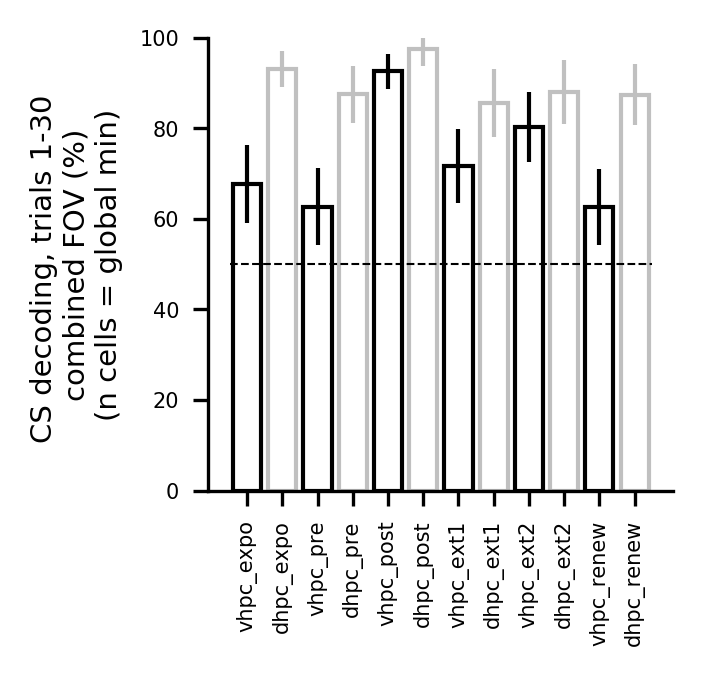

In [28]:
fig, ax = pl.subplots(1, 1, figsize=(2, 2))
#sessionsb = 'pre','post','ext1','ext2','reinstate','odor expo'
values = [vhpc_and_dhpc_scores_CS_first30_gmin[keys]*100 for keys in vhpc_and_dhpc_scores_CS_first30_gmin]
pt.plot_bars(values, ax=ax, colors = ['k','silver'])
ax.hlines(50, -0.5, len(vhpc_and_dhpc_scores_CS_first30_gmin)-0.5, linestyles='dashed')

ax.set_xticks(range(12))
ax.set_xticklabels(vhpc_and_dhpc_scores_CS_first30_gmin.keys(), rotation=90)
ax.set_ylabel('CS decoding, trials 1-30 \ncombined FOV (%)\n(n cells = global min)')
ax.set_ylim(0,100)
pvs = []
#pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 104)) #will compare sessions 'x' in values[x]
#pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 109))
#pvs.append(pt.add_significance(ax, values[2], values[3], 2, 3, 100))
#pvs.append(pt.add_significance(ax, values[3], values[4], 3, 4, 106))
#pvs.append(pt.add_significance(ax, values[0], values[4], 0, 4, 120))

print 'dHPC20 removed from pre due to stellar behavioral performance (d\'=2)'
fig.savefig('../img/%s__bars_CS_first30_gmin.pdf'%NOTEBOOK_NAME)
np.savetxt('../img/%s__bars_CS_first30_gmin.pvs'%NOTEBOOK_NAME,  pvs, header='Mann-Whitney U two-sided')

dHPC20 removed from pre due to stellar behavioral performance (d'=2)


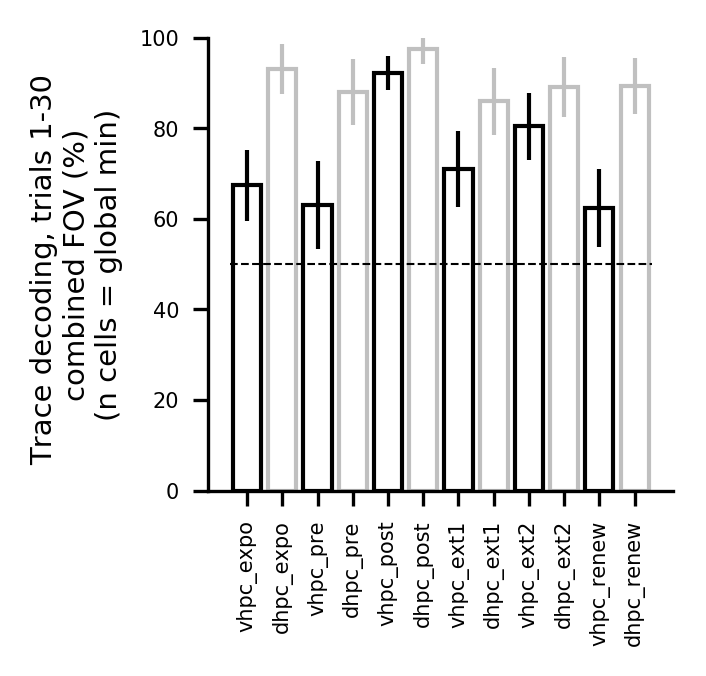

In [29]:
fig, ax = pl.subplots(1, 1, figsize=(2, 2))
#sessionsb = 'pre','post','ext1','ext2','reinstate','odor expo'
values = [vhpc_and_dhpc_scores_first30_gmin[keys]*100 for keys in vhpc_and_dhpc_scores_first30_gmin]
pt.plot_bars(values, ax=ax, colors = ['k','silver'])
ax.hlines(50, -0.5, len(vhpc_and_dhpc_scores_first30_gmin)-0.5, linestyles='dashed')

ax.set_xticks(range(12))
ax.set_xticklabels(vhpc_and_dhpc_scores_first30_gmin.keys(), rotation=90)
ax.set_ylabel('Trace decoding, trials 1-30 \ncombined FOV (%)\n(n cells = global min)')
ax.set_ylim(0,100)
#pvs = []
#pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 104)) #will compare sessions 'x' in values[x]
#pvs.append(pt.add_significance(ax, values[1], values[2], 1, 2, 109))
#pvs.append(pt.add_significance(ax, values[2], values[3], 2, 3, 100))
#pvs.append(pt.add_significance(ax, values[3], values[4], 3, 4, 106))
#pvs.append(pt.add_significance(ax, values[0], values[4], 0, 4, 120))

print 'dHPC20 removed from pre due to stellar behavioral performance (d\'=2)'
fig.savefig('../img/%s__bars_first30_gmin.pdf'%NOTEBOOK_NAME)
np.savetxt('../img/%s__bars_first30_gmin.pvs'%NOTEBOOK_NAME,  pvs, header='Mann-Whitney U two-sided')

In [30]:
save_workspace(db)

Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
